In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_drug_data, clinical_trial_data, on = "Mouse ID")

# Display the data table for preview
combined_data.head(5)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_grouped = combined_data.groupby(["Drug", "Timepoint"]).mean()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_mean_df = pd.DataFrame(mean_tumor_grouped)
# Preview DataFrame
reindexed_tumor_mean_df = tumor_mean_df.reset_index()
reindexed_tumor_mean_df.head(11)


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_tumor_grouped = combined_data.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumor_sem_df = pd.DataFrame(sem_tumor_grouped)
# Preview DataFrame
reindexed_tumor_sem_df = tumor_sem_df.reset_index()
reindexed_tumor_sem_df.head(5)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
reformat_tumor_response = reindexed_tumor_mean_df.pivot(index='Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
reformat_tumor_sem = reindexed_tumor_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'Tumor Volume (mm3)')
# Preview that Reformatting worked
reformat_tumor_response.head(5)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


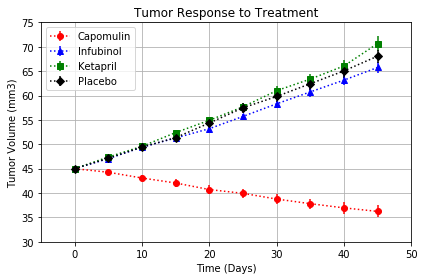

In [5]:
# Generate the Plot (with Error Bars)
x_axis = reformat_tumor_response.index


plt.errorbar(x_axis, reformat_tumor_response['Capomulin'], yerr=reformat_tumor_sem['Capomulin'], marker= 'o', color = 'red', linestyle=':')
plt.errorbar(x_axis, reformat_tumor_response['Infubinol'], yerr=reformat_tumor_sem['Infubinol'], marker= '^', color = 'blue', linestyle=':')
plt.errorbar(x_axis, reformat_tumor_response['Ketapril'], yerr=reformat_tumor_sem['Ketapril'], marker= 's', color = 'green', linestyle=':')
plt.errorbar(x_axis, reformat_tumor_response['Placebo'], yerr=reformat_tumor_sem['Placebo'], marker= 'D', color = 'black', linestyle=':')


plt.title("Tumor Response to Treatment")
                                                                                                                     
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)") 
plt.legend(loc="upper left")
plt.ylim(30,75)
plt.xlim(-5,50)
plt.grid()

# Save the Figure                                                                                                                    
plt.tight_layout()
plt.savefig("data/tumor_response.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [6]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_grouped = combined_data.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
metastatic_mean_df = pd.DataFrame(mean_metastatic_grouped)
# Preview DataFrame
reindexed_metastatic_mean_df = metastatic_mean_df.reset_index()
reindexed_metastatic_mean_df.head(5)


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [7]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metastatic_grouped = combined_data.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
metastatic_sem_df = pd.DataFrame(sem_metastatic_grouped)
# Preview DataFrame
reindexed_metastatic_sem_df = metastatic_sem_df.reset_index()

metastatic_sem_df.head(5)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [8]:
# Minor Data Munging to Re-Format the Data Frames
reformat_metastatic_response = reindexed_metastatic_mean_df.pivot(index = 'Timepoint', columns = 'Drug', values = 'Metastatic Sites')
reformat_metastatic_sem = reindexed_metastatic_sem_df.pivot(index='Timepoint', columns = 'Drug', values = 'Metastatic Sites')
# Preview that Reformatting worked
reformat_metastatic_response.head(5)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


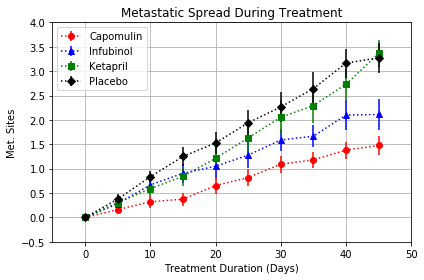

In [9]:
# Generate the Plot (with Error Bars)

x_axis1 = reformat_metastatic_response.index

plt.errorbar(x_axis1, reformat_metastatic_response['Capomulin'], yerr=reformat_metastatic_sem['Capomulin'], marker= 'o', color = 'red', linestyle=':')
plt.errorbar(x_axis1, reformat_metastatic_response['Infubinol'], yerr=reformat_metastatic_sem['Infubinol'], marker= '^', color = 'blue', linestyle=':')
plt.errorbar(x_axis1, reformat_metastatic_response['Ketapril'], yerr=reformat_metastatic_sem['Ketapril'], marker= 's', color = 'green', linestyle=':')
plt.errorbar(x_axis1, reformat_metastatic_response['Placebo'], yerr=reformat_metastatic_sem['Placebo'], marker= 'D', color = 'black', linestyle=':')



plt.title("Metastatic Spread During Treatment")
                                                                                                                     
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites") 
plt.legend(loc="upper left")
plt.ylim(-0.5,4.0)
plt.xlim(-5,50)
plt.grid()

# Save the Figure                                                                                                                    
plt.tight_layout()
plt.savefig("data/metastatic_response.png")

# Show the Figure
plt.show()


## Survival Rates

In [10]:
# Store the Count of Mice Grouped by Drug and Timepoint
count_mice_grouped = combined_data.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
count_mice_df = pd.DataFrame(count_mice_grouped)
count_mice_df = count_mice_df.rename(columns={"Mouse ID": "Mouse Count"})
# Preview DataFrame
reindexed_count_mice_df = count_mice_df.reset_index()
reindexed_count_mice_df.head(5)



,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [11]:
# Minor Data Munging to Re-Format the Data Frames
reformat_survival_rate = reindexed_count_mice_df.pivot(index='Timepoint', columns = 'Drug', values = 'Mouse Count')

# Preview the Data Frame
reformat_survival_rate.head(5)





Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


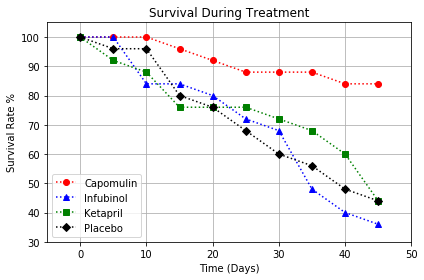

In [12]:
# Generate the Plot (Accounting for percentages)
x_axis2 = reformat_survival_rate.index
percent_capomulin = (reformat_survival_rate/reformat_survival_rate.iloc[0])*100

plt.errorbar(x_axis2, percent_capomulin['Capomulin'], marker= 'o', color = 'red', linestyle=':')
plt.errorbar(x_axis2, percent_capomulin['Infubinol'], marker= '^', color = 'blue', linestyle=':')
plt.errorbar(x_axis2, percent_capomulin['Ketapril'], marker= 's', color = 'green', linestyle=':')
plt.errorbar(x_axis2, percent_capomulin['Placebo'], marker= 'D', color = 'black', linestyle=':')


plt.title("Survival During Treatment")
                                                                                                                     
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate %") 
plt.legend(loc="bottom left")
plt.ylim(30,105)
plt.xlim(-5,50)
plt.grid()

# Save the Figure
plt.tight_layout()
plt.savefig("data/survival_rate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [13]:
# Calculate the percent changes for each drug
percentage_change = ((reformat_tumor_response.iloc[-1] - reformat_tumor_response.iloc[0])/reformat_tumor_response.iloc[0])*100

# Display the data to confirm
print(percentage_change)


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64


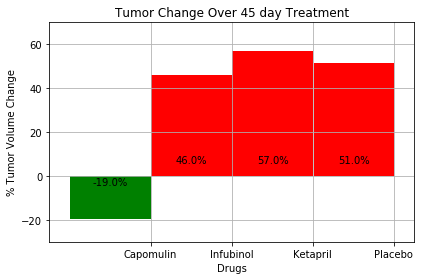

In [21]:
# Store all Relevant Percent Changes into a Tuple
relevant_percentage_change = (percentage_change['Capomulin'], percentage_change['Infubinol'], percentage_change['Ketapril'], percentage_change['Placebo'])

# Splice the data between passing and failing drugs
failing_drugs = relevant_percentage_change[0]
passing_drugs = relevant_percentage_change[1:]

# Orient widths. Add labels, tick marks, etc. 
x_axis = np.arange(len(relevant_percentage_change))
tick_location=[values for values in x_axis]
plt.xticks(tick_location, ["Capomulin", "Infubinol", "Ketapril", "Placebo"])

rect=plt.bar(x_axis, relevant_percentage_change, color=['g', 'r', 'r', 'r'], alpha=1, align="edge", width=-0.99)


plt.xlim(-1.25, (max(x_axis)+0.25))
plt.ylim(-30, 70)

plt.title("Tumor Change Over 45 day Treatment")
plt.xlabel("Drugs")
plt.ylabel("% Tumor Volume Change")
plt.grid()

# Use functions to label the percentages of changes
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        
        # Fraction of axis height taken up by this rectangle
        label_position = (abs(height)/height)*5
      
        plt.text(rect.get_x() + rect.get_width()/2., label_position,
                '%1.1f%%' % int(height),
                ha='center', va='bottom')
        
# Call functions to implement the function calls
autolabel(rect)

# Save the Figure
plt.tight_layout()
plt.savefig("data/summary_bar_graph.png")

# Show the Figure
plt.show()